<a href="https://colab.research.google.com/github/ashutosh-gupta2111/Exploratory_project/blob/master/Final_Exploratory_Project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Welcome to the code of Exploratory Project of Ashutosh Gupta and Pawan Kumar Sahu.**

In [2]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


Importing all required libraries

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [4]:
labels = os.listdir('/content/grive/MyDrive/train')

Visualizing a Image

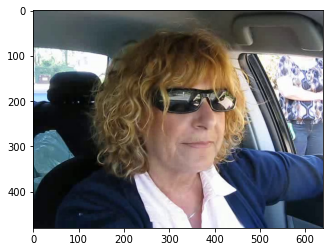

In [5]:
plt.imshow(plt.imread("/content/grive/MyDrive/train/no_yawn/1003.jpg"))

In [6]:
def face_detector(face_cas_path="/content/grive/MyDrive/file.xml"):
  onlyface = []
  links=['/content/grive/MyDrive/train/yawn','/content/grive/MyDrive/train/no_yawn']
  for link in links:
    index=links.index(link)
    print(link,index)
    for image in os.listdir(link):
            image_array = cv2.imread(os.path.join(link, image), cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(face_cas_path)
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
            for (x, y, w, h) in faces:
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                roi_color = img[y:y+h, x:x+w]
                ne_array = cv2.resize(roi_color, (145, 145))
                onlyface.append([ne_array, index])
  return onlyface
    

faceonly = face_detector()

/content/grive/MyDrive/train/yawn 0
/content/grive/MyDrive/train/no_yawn 1


In [7]:
faceonly

[[array([[[  0, 255,   0],
          [  0, 255,   0],
          [  0, 255,   0],
          ...,
          [  0, 255,   0],
          [  0, 255,   0],
          [  0, 255,   0]],
  
         [[  0, 255,   0],
          [  1,  77,   1],
          [  2,  43,   2],
          ...,
          [125, 170, 125],
          [127, 171, 126],
          [ 36, 232,  35]],
  
         [[  0, 255,   0],
          [  2,  43,   2],
          [  2,   2,   2],
          ...,
          [147, 151, 147],
          [149, 153, 148],
          [ 42, 227,  41]],
  
         ...,
  
         [[  0, 255,   0],
          [101, 148, 106],
          [ 91,  97,  96],
          ...,
          [227, 222, 219],
          [234, 229, 226],
          [ 67, 249,  65]],
  
         [[  0, 255,   0],
          [100, 146, 104],
          [ 92,  96,  95],
          ...,
          [244, 239, 236],
          [236, 231, 228],
          [ 64, 247,  62]],
  
         [[  0, 255,   0],
          [ 26, 222,  27],
          [ 27, 212,  28

In [8]:
def eye_data():
    data = []
    n_links=['/content/grive/MyDrive/train/Closed','/content/grive/MyDrive/train/Open']
    for n_link in n_links:
        n_index=n_links.index(n_link)
        n_index+=2
        print(n_link,n_index)
        for img in os.listdir(n_link):
          img_array = cv2.imread(os.path.join(n_link, img), cv2.IMREAD_COLOR)
          n_array = cv2.resize(img_array, (145, 145))
          data.append([n_array, n_index])
    return data            
                
                

    

        

In [9]:
data_train = eye_data()

/content/grive/MyDrive/train/Closed 2
/content/grive/MyDrive/train/Open 3


In [10]:
data_train

[[array([[[ 77,  77,  93],
          [ 75,  75,  91],
          [ 72,  72,  88],
          ...,
          [140, 123, 136],
          [134, 117, 130],
          [133, 119, 131]],
  
         [[ 79,  79,  95],
          [ 78,  78,  94],
          [ 75,  75,  91],
          ...,
          [126, 109, 122],
          [125, 108, 121],
          [123, 109, 121]],
  
         [[ 79,  80,  94],
          [ 79,  80,  94],
          [ 77,  77,  93],
          ...,
          [120, 103, 116],
          [116,  99, 112],
          [118, 104, 116]],
  
         ...,
  
         [[ 96,  92, 121],
          [ 96,  92, 121],
          [ 95,  91, 120],
          ...,
          [101, 101, 131],
          [102, 102, 132],
          [101, 101, 131]],
  
         [[ 96,  92, 121],
          [ 96,  92, 121],
          [ 97,  93, 122],
          ...,
          [102, 102, 132],
          [102, 102, 132],
          [ 99,  99, 129]],
  
         [[ 97,  92, 121],
          [ 96,  91, 120],
          [ 98,  93, 122

In [11]:
def provide_data():
    yaw_no = face_detector()
    data = eye_data()
    yaw_no.extend(data)
    return np.array(yaw_no)

In [12]:
new_data = provide_data()

/content/grive/MyDrive/train/yawn 0
/content/grive/MyDrive/train/no_yawn 1
/content/grive/MyDrive/train/Closed 2
/content/grive/MyDrive/train/Open 3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """


In [13]:
X_val = []
y_val = []


In [14]:
new_data

array([[array([[[  0, 255,   0],
                [  0, 255,   0],
                [  0, 255,   0],
                ...,
                [  0, 255,   0],
                [  0, 255,   0],
                [  0, 255,   0]],

               [[  0, 255,   0],
                [  1,  77,   1],
                [  2,  43,   2],
                ...,
                [125, 170, 125],
                [127, 171, 126],
                [ 36, 232,  35]],

               [[  0, 255,   0],
                [  2,  43,   2],
                [  2,   2,   2],
                ...,
                [147, 151, 147],
                [149, 153, 148],
                [ 42, 227,  41]],

               ...,

               [[  0, 255,   0],
                [101, 148, 106],
                [ 91,  97,  96],
                ...,
                [227, 222, 219],
                [234, 229, 226],
                [ 67, 249,  65]],

               [[  0, 255,   0],
                [100, 146, 104],
                [ 92,  96,  9

Some Preprocessing

In [15]:
for feature, label in new_data:
    X_val.append(feature)
    y_val.append(label)

In [16]:
X = np.array(X_val)
X = X.reshape(-1, 145, 145, 3)

In [17]:
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y_val)

In [18]:
y = np.array(y)


*BUILDING MODEL*

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.35)

In [20]:
print("The length of training set is ",len(X_train))
print("The length of testing set is ",len(y))

The length of training set is  1251
The length of testing set is  1925


In [21]:
rescale=1/255
zoomrange=0.2
rotationrange=30
print("The properties are decided as follows ",)
print("The rescale as",rescale)
print("The zoomrange as",zoomrange)
print("The rotation range as",rotationrange)

The properties are decided as follows 
The rescale as 0.00392156862745098
The zoomrange as 0.2
The rotation range as 30


In [22]:
train_data = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=rotationrange)
test_data = ImageDataGenerator(rescale=1/255)

train_data = train_data.flow(np.array(X_train), y_train, shuffle=False)
test_data = test_data.flow(np.array(X_test), y_test, shuffle=False)

In [23]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 143, 143, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 71, 71, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0

In [24]:
steps = model.fit(train_data, epochs=20, validation_data=test_data, shuffle=True, validation_steps=len(test_data))

Epoch 1/20
40/40 [==============================] - 25s 296ms/step - loss: 1.0651 - accuracy: 0.5308 - val_loss: 0.5628 - val_accuracy: 0.8012
Epoch 2/20
40/40 [==============================] - 11s 275ms/step - loss: 0.5297 - accuracy: 0.7882 - val_loss: 0.4933 - val_accuracy: 0.7804
Epoch 3/20
40/40 [==============================] - 11s 275ms/step - loss: 0.4032 - accuracy: 0.8313 - val_loss: 0.3414 - val_accuracy: 0.8591
Epoch 4/20
40/40 [==============================] - 11s 276ms/step - loss: 0.3525 - accuracy: 0.8449 - val_loss: 0.2983 - val_accuracy: 0.8680
Epoch 5/20
40/40 [==============================] - 11s 279ms/step - loss: 0.3186 - accuracy: 0.8705 - val_loss: 0.2756 - val_accuracy: 0.8976
Epoch 6/20
40/40 [==============================] - 11s 278ms/step - loss: 0.2788 - accuracy: 0.8801 - val_loss: 0.3632 - val_accuracy: 0.8487
Epoch 7/20
40/40 [==============================] - 11s 280ms/step - loss: 0.3192 - accuracy: 0.8761 - val_loss: 0.2390 - val_accuracy: 0.8976

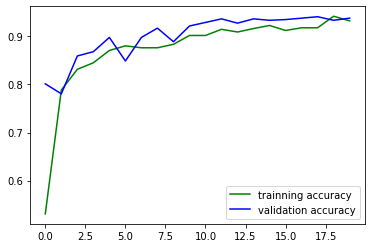

In [25]:
accu = steps.history['accuracy']
val_accu = steps.history['val_accuracy']
epochs = range(len(accu))

plt.plot(range(len(accu)), accu, "g", label="trainning accuracy")
plt.plot(range(len(accu)), val_accu, "b", label="validation accuracy")
plt.legend()
plt.show()

In [26]:
final_prediction = np.argmax(model.predict(X_test), axis=-1)

In [27]:
final_prediction

array([3, 3, 2, 1, 1, 3, 2, 2, 1, 3, 3, 3, 3, 2, 2, 2, 3, 1, 0, 3, 2, 3,
       2, 1, 1, 2, 2, 2, 3, 2, 3, 2, 2, 2, 1, 3, 3, 2, 1, 3, 3, 3, 2, 3,
       2, 2, 3, 3, 2, 3, 3, 1, 2, 0, 3, 3, 2, 2, 2, 0, 3, 3, 1, 2, 2, 3,
       2, 3, 2, 2, 1, 3, 3, 3, 2, 0, 2, 3, 1, 3, 1, 0, 3, 2, 2, 2, 2, 0,
       3, 1, 2, 3, 3, 3, 1, 1, 3, 0, 3, 3, 3, 1, 3, 0, 2, 3, 2, 1, 2, 2,
       1, 1, 2, 1, 0, 3, 3, 3, 2, 2, 1, 3, 3, 1, 1, 2, 3, 3, 2, 0, 3, 2,
       1, 3, 2, 2, 3, 3, 2, 1, 2, 2, 2, 1, 1, 3, 3, 3, 2, 0, 3, 3, 3, 3,
       3, 0, 1, 1, 3, 1, 3, 2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 1, 2, 0, 3, 3,
       2, 2, 0, 2, 3, 0, 2, 1, 3, 2, 3, 1, 2, 2, 1, 3, 2, 2, 3, 3, 3, 0,
       3, 2, 3, 0, 2, 0, 0, 1, 2, 3, 2, 0, 3, 1, 2, 2, 2, 2, 1, 3, 1, 1,
       1, 0, 2, 3, 3, 3, 3, 0, 1, 2, 0, 1, 3, 3, 1, 3, 3, 1, 3, 3, 0, 1,
       0, 0, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2,
       3, 2, 2, 0, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 0, 1, 0, 3, 3, 2, 3, 2,
       2, 1, 2, 2, 1, 3, 2, 0, 2, 2, 1, 3, 2, 3, 1,

In [28]:
labels = ["yawn", "no_yawn", "Closed", "Open"]

**CLASSIFICATION REPORT**

In [29]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), final_prediction, target_names=labels))

              precision    recall  f1-score   support

        yawn       0.93      0.66      0.77        77
     no_yawn       0.74      0.93      0.82        86
      Closed       0.89      0.98      0.93       245
        Open       0.99      0.90      0.94       266

    accuracy                           0.91       674
   macro avg       0.89      0.87      0.87       674
weighted avg       0.92      0.91      0.91       674



In [35]:
model.save('explopromodel.h5')

*We will Preprocess the image*

In [30]:
def made(filepath):
    img = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img = img / 255
    new_array = cv2.resize(img, (145, 145))
    return new_array.reshape(-1, 145, 145, 3)

new_model = tf.keras.models.load_model("/content/grive/MyDrive/exploproj.h5")

In [31]:
prediction = new_model.predict([made("/content/grive/MyDrive/train/no_yawn/1067.jpg")])


In [32]:
val=np.argmax(prediction)

In [33]:
val

1

***Final Prediction of test Image***

In [34]:
if(val==0):
  print("The person is much sleepy at yellow level")
elif(val==2):
  print("The person is sleepy at red level")
else:
  print("The person is not at all sleepy.")



    

The person is not at all sleepy.
